   ID     Age         City  Gender AgeGroup  City_Chicago  City_Los Angeles  \
0   1  25.000     New York    Male    18-30             0                 0   
1   2  31.875  Los Angeles  Female    30-40             0                 1   
2   3  40.000      Chicago    Male    40-50             1                 0   
3   4  33.000      Unknown  Female    30-40             0                 0   
4   5  28.000     New York  Female    18-30             0                 0   

   City_New York  City_Unknown  
0              1             0  
1              0             0  
2              0             0  
3              0             1  
4              1             0  


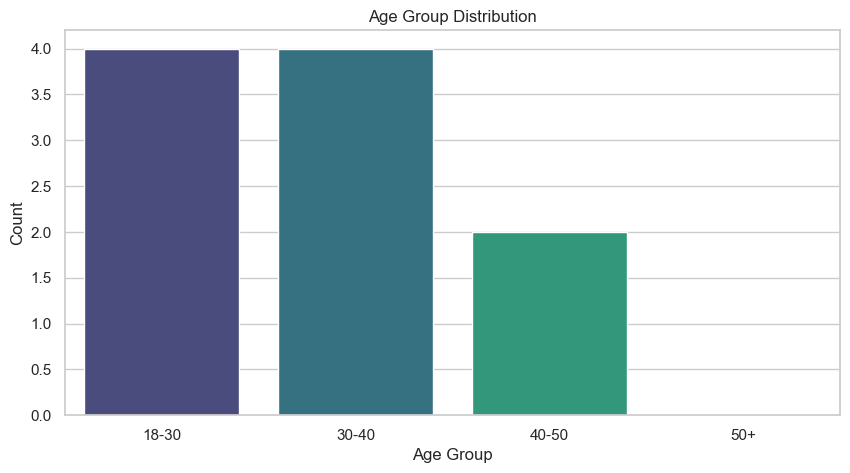

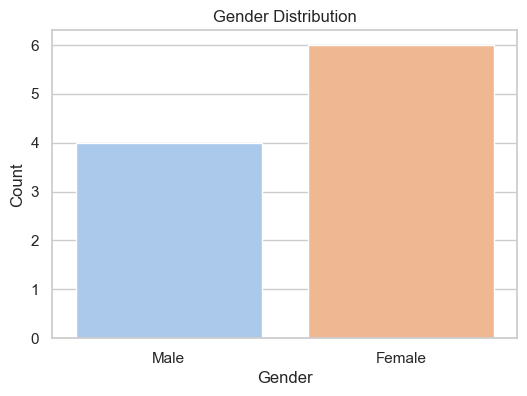

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('age_city_dataset.csv')

def fill_missing(df):
    mean_age = df['Age'].mean()
    df['Age'] = df['Age'].fillna(mean_age)
    df['City'] = df['City'].fillna('Unknown')
    return df

def remove_duplicates(df):
    return df.drop_duplicates()

def normalize_gender(df):
    gender_map = {'M': 'Male', 'F': 'Female', 'Male': 'Male', 'Female': 'Female'}
    df['Gender'] = df['Gender'].map(gender_map)
    return df

def age_groups(df):
    bins = [18, 30, 40, 50, np.inf]
    labels = ['18-30', '30-40', '40-50', '50+']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    return df

def city_dummies(df):
    dummies = pd.get_dummies(df['City'], prefix='City')
    df = pd.concat([df, dummies], axis=1)
    return df

df = fill_missing(df)
df = remove_duplicates(df)
df = normalize_gender(df)
df = age_groups(df)
df = city_dummies(df)

print(df.head())

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='AgeGroup', palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
